## Trabalho Final LPA - Prática
---

## 1 Análise Exploratória dos dados

In [1]:
# Biblioteca Pandas - Manipulação de dados
import pandas as pd
# Biblioteca Seaborn - Criação de gráficos
import seaborn as sns
# Biblioteca Matplotlib - Criação de gráficos
import matplotlib.pyplot as plt

# OPCIONAL - Biblioteca para ignorar mensagens de warning (aviso) ao rodar uma célula de código
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Bibliotecas de machine learning
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import LabelEncoder

# Métricas de avaliação dos modelos
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

---
# 1-a.

In [4]:
# Função read_csv para carregar base de dados "precos_carros_brasil.csv"
dados = pd.read_csv('precos_carros_brasil.csv')

In [5]:
# Imprimindo as 5 primeiras linhas
dados.head()

,year_of_reference,month_of_reference,fipe_code,authentication,brand,model,fuel,gear,engine_size,year_model,avg_price_brl
0,2021.0,January,004001-0,cfzlctzfwrcp,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Gasoline,manual,1,2002.0,9162.0
1,2021.0,January,004001-0,cdqwxwpw3y2p,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Gasoline,manual,1,2001.0,8832.0
2,2021.0,January,004001-0,cb1t3xwwj1xp,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Gasoline,manual,1,2000.0,8388.0
3,2021.0,January,004001-0,cb9gct6j65r0,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Alcohol,manual,1,2000.0,8453.0
4,2021.0,January,004003-7,g15wg0gbz1fx,GM - Chevrolet,Corsa Pick-Up GL/ Champ 1.6 MPFI / EFI,Gasoline,manual,"1,6",2001.0,12525.0


In [6]:
# Validando número de linhas e colunas
dados.shape

(267542, 11)

In [7]:
# Adicionando função keep_default_na=False para evitar que dados NaN sujem o df como demonstrado nas colunas year_of_reference e year_model
dados = pd.read_csv('precos_carros_brasil.csv', keep_default_na=False)

In [8]:
# Imprimindo as 5 primeiras linhas
dados.head()

,year_of_reference,month_of_reference,fipe_code,authentication,brand,model,fuel,gear,engine_size,year_model,avg_price_brl
0,2021,January,004001-0,cfzlctzfwrcp,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Gasoline,manual,1,2002,9162
1,2021,January,004001-0,cdqwxwpw3y2p,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Gasoline,manual,1,2001,8832
2,2021,January,004001-0,cb1t3xwwj1xp,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Gasoline,manual,1,2000,8388
3,2021,January,004001-0,cb9gct6j65r0,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Alcohol,manual,1,2000,8453
4,2021,January,004003-7,g15wg0gbz1fx,GM - Chevrolet,Corsa Pick-Up GL/ Champ 1.6 MPFI / EFI,Gasoline,manual,"1,6",2001,12525


In [9]:
# Validando a mesma quantidade de número de linhas e colunas
dados.shape

(267542, 11)

---
# 1-b.

In [10]:
# Verificando valores faltantes
dados.isna().any()

year_of_reference     False
month_of_reference    False
fipe_code             False
authentication        False
brand                 False
model                 False
fuel                  False
gear                  False
engine_size           False
year_model            False
avg_price_brl         False
dtype: bool

In [11]:
# Verificando a quantidade de valores faltantes por coluna
dados.isna().sum()

year_of_reference     0
month_of_reference    0
fipe_code             0
authentication        0
brand                 0
model                 0
fuel                  0
gear                  0
engine_size           0
year_model            0
avg_price_brl         0
dtype: int64

In [ ]:
# Substituir os valores faltantes por "Não Categorizado". Argumento inplace = true significa que a modificação será aplicada  
# Na mesma variável - chamada dados - sem precisar criar outra variável (dados_2, dados_V2, etc)
#for col in dados.columns:
#    dados[col].fillna('Não Categorizado', inplace=True)

# Verificando a quantidade de valores faltantes por coluna
#dados.isna().sum()

# Aplicando keep_default_na=False não é necessário adicionar tratativa para valores faltantes

---
# 1-c.

In [12]:
# Verificando duplicados
dados.duplicated().sum() 

65246

In [13]:
# Removendo duplicados
dados.drop_duplicates(inplace=True)

In [14]:
# nº de linhas e colunas após mudanças.
dados.shape

(202296, 11)

In [ ]:
#origem (267542, 11)
#apos tratamento (202296, 11)
#diff 65246

In [15]:
# Verificando começo dataframe
dados.head()

,year_of_reference,month_of_reference,fipe_code,authentication,brand,model,fuel,gear,engine_size,year_model,avg_price_brl
0,2021,January,004001-0,cfzlctzfwrcp,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Gasoline,manual,1,2002,9162
1,2021,January,004001-0,cdqwxwpw3y2p,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Gasoline,manual,1,2001,8832
2,2021,January,004001-0,cb1t3xwwj1xp,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Gasoline,manual,1,2000,8388
3,2021,January,004001-0,cb9gct6j65r0,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Alcohol,manual,1,2000,8453
4,2021,January,004003-7,g15wg0gbz1fx,GM - Chevrolet,Corsa Pick-Up GL/ Champ 1.6 MPFI / EFI,Gasoline,manual,"1,6",2001,12525


In [16]:
# Verificando final dataframe
dados.tail()

,year_of_reference,month_of_reference,fipe_code,authentication,brand,model,fuel,gear,engine_size,year_model,avg_price_brl
202293,2023,January,005539-5,chmwfg3l5hbp,VW - VolksWagen,Gol Last Edition 1.0 Flex 12V 5p,Gasoline,manual,1,2023,95997
202294,2023,January,005539-5,cdj27srtcvcdqw,VW - VolksWagen,Gol Last Edition 1.0 Flex 12V 5p,Gasoline,manual,1,2023,87828
202295,2023,January,005540-9,9w64fg6dhqp,VW - VolksWagen,Polo Track 1.0 Flex 12V 5p,Gasoline,manual,1,2023,80845
202296,2023,January,005540-9,7hbnjmj9z5dqw,VW - VolksWagen,Polo Track 1.0 Flex 12V 5p,Gasoline,manual,1,2023,74458
202297,,,,,,,,,,,


In [17]:
# Deletando ultima linha sem dados
dados2 = dados.drop(202297)

---
# 1-d.

In [18]:
# Imprime o tipo de dado em cada coluna: object - variáveis categóricas; float64 e int64 - variáveis numéricas
dados2.dtypes

year_of_reference     object
month_of_reference    object
fipe_code             object
authentication        object
brand                 object
model                 object
fuel                  object
gear                  object
engine_size           object
year_model            object
avg_price_brl         object
dtype: object

In [19]:
# Criando categorias numéricas e categóricas
numericas_cols = [col for col in dados2.columns if dados2[col].dtype != 'object']
categoricas_cols = [col for col in dados2.columns if dados2[col].dtype == 'object']

In [20]:
# Resumo das variáveis numéricas - Imprime alguns valores de medidas de tendências centrais 
dados2[numericas_cols].describe()

ValueError: Cannot describe a DataFrame without columns

In [21]:
# Resumo das variáveis categóricas - Imprime alguns valores de estatística descritiva
dados2[categoricas_cols].describe()

,year_of_reference,month_of_reference,fipe_code,authentication,brand,model,fuel,gear,engine_size,year_model,avg_price_brl
count,202295,202295,202295,202295,202295,202295,202295,202295,202295,202295,202295
unique,4,12,2091,202295,6,2112,3,2,29,48,92565
top,2022,January,003281-6,cfzlctzfwrcp,Fiat,Palio Week. Adv/Adv TRYON 1.8 mpi Flex,Gasoline,manual,"1,6",2015,69990
freq,97797,24260,425,1,44962,425,168684,161883,47420,10557,51


---
# 1-e.

In [27]:
dados2[['model','brand']].value_counts()

model                                   brand          
Palio Week. Adv/Adv TRYON 1.8 mpi Flex  Fiat               425
Focus 1.6 S/SE/SE Plus Flex 8V/16V 5p   Ford               425
Saveiro 1.6 Mi/ 1.6 Mi Total Flex 8V    VW - VolksWagen    400
Focus 2.0 16V/SE/SE Plus Flex 5p Aut.   Ford               400
Doblo Adv/Adv TRYON/LOCKER 1.8 Flex     Fiat               375
                                                          ... 
Saveiro Robust 1.6 Total Flex 16V CD    VW - VolksWagen      2
Polo Track 1.0 Flex 12V 5p              VW - VolksWagen      2
STEPWAY Zen Flex 1.0 12V Mec.           Renault              2
Gol Last Edition 1.0 Flex 12V 5p        VW - VolksWagen      2
KICKS Active 1.6 16V Flex Aut.          Nissan               2
Name: count, Length: 2112, dtype: int64

In [28]:
# Contagem de valores por categoria de 'Modelo'
dados2['model'].value_counts()

model
Palio Week. Adv/Adv TRYON 1.8 mpi Flex    425
Focus 1.6 S/SE/SE Plus Flex 8V/16V 5p     425
Focus 2.0 16V/SE/SE Plus Flex 5p Aut.     400
Saveiro 1.6 Mi/ 1.6 Mi Total Flex 8V      400
Corvette 5.7/ 6.0, 6.2 Targa/Stingray     375
                                         ... 
STEPWAY Zen Flex 1.0 12V Mec.               2
Saveiro Robust 1.6 Total Flex 16V CD        2
Saveiro Robust 1.6 Total Flex 16V           2
Gol Last Edition 1.0 Flex 12V 5p            2
Polo Track 1.0 Flex 12V 5p                  2
Name: count, Length: 2112, dtype: int64

In [29]:
# Contagem de valores por categoria 'Montadora'
dados2['brand'].value_counts()

brand
Fiat               44962
VW - VolksWagen    44312
GM - Chevrolet     38590
Ford               33150
Renault            29191
Nissan             12090
Name: count, dtype: int64

---
## 2 Visualização dos dados

# 2-a.

In [24]:
# Montar parametros para o gráfico
carros_por_marca = dados2['brand'].value_counts()
labels = dados2['brand'].value_counts().index.to_list()

carros_por_marca, labels

(brand
 Fiat               44962
 VW - VolksWagen    44312
 GM - Chevrolet     38590
 Ford               33150
 Renault            29191
 Nissan             12090
 Name: count, dtype: int64,
 ['Fiat', 'VW - VolksWagen', 'GM - Chevrolet', 'Ford', 'Renault', 'Nissan'])

Text(0, 0.5, 'Total de Carros')

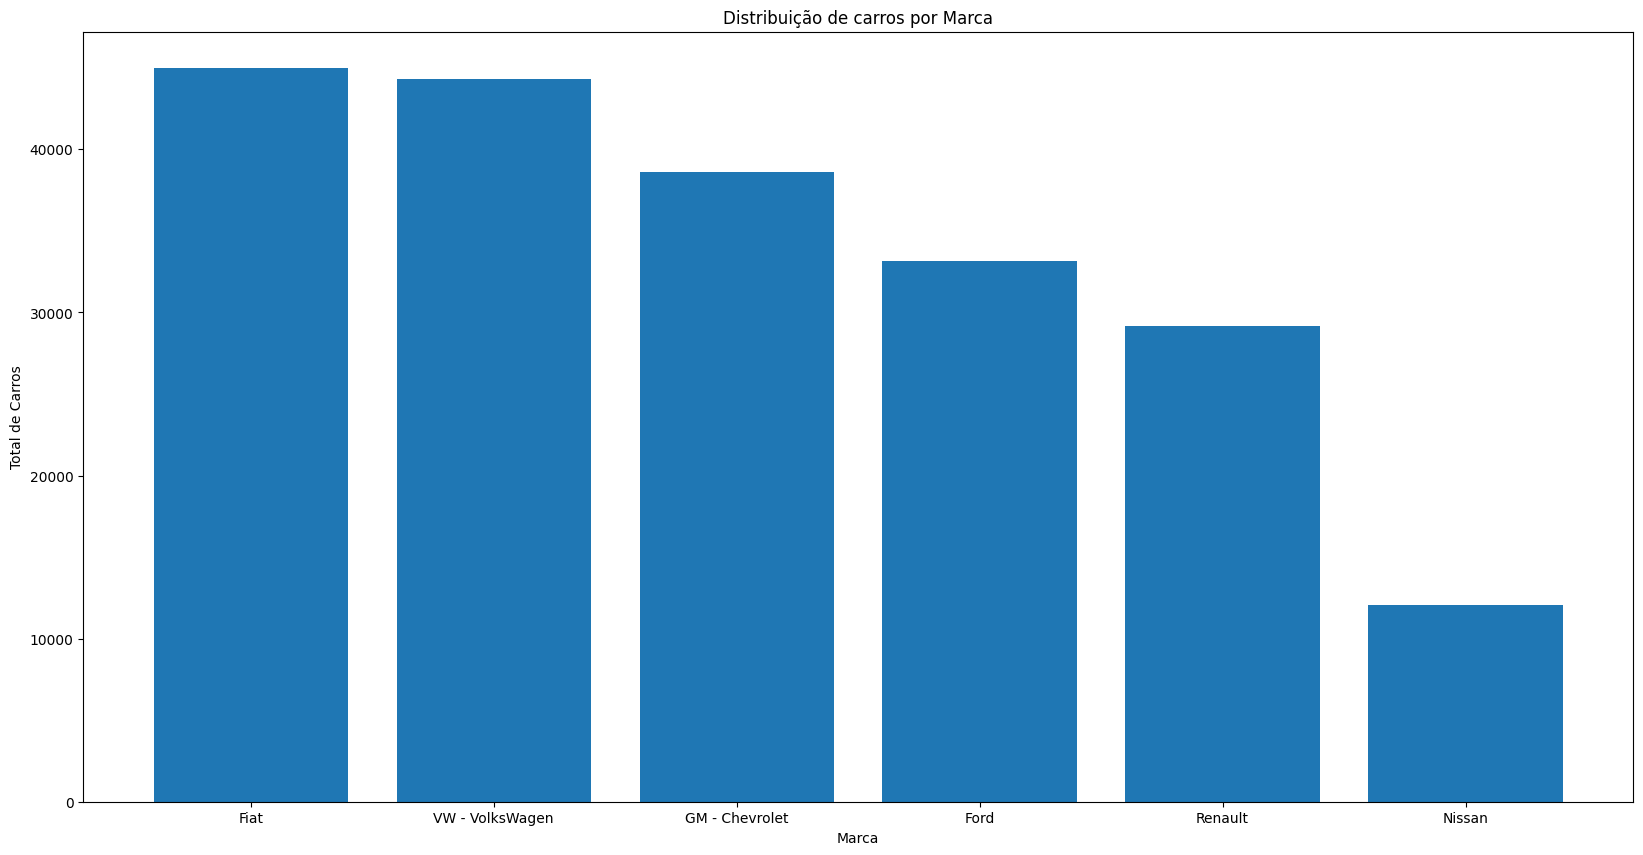

In [39]:
# Gráfico da distribuição de carros por Marca - plt é a biblioteca Matplotlib
plt.figure(figsize=(20,10))
plt.bar(labels, carros_por_marca.values) # plt.bar para gráfico de barras. Variáveis nos eixos X e Y
plt.xlabel('Marca')
plt.title('Distribuição de carros por Marca') # plt.title para inserir título no gráfico
plt.ylabel('Total de Carros') # # plt.ylabel para inserir título no gráfico

---
# 2-b.

In [40]:
# Montar parametros para o gráfico
carros_por_engrenagem = dados2['gear'].value_counts()
labels = dados2['gear'].value_counts().index.to_list()

carros_por_engrenagem, labels

(gear
 manual       161883
 automatic     40412
 Name: count, dtype: int64,
 ['manual', 'automatic'])

Text(0, 0.5, 'Total de Carros')

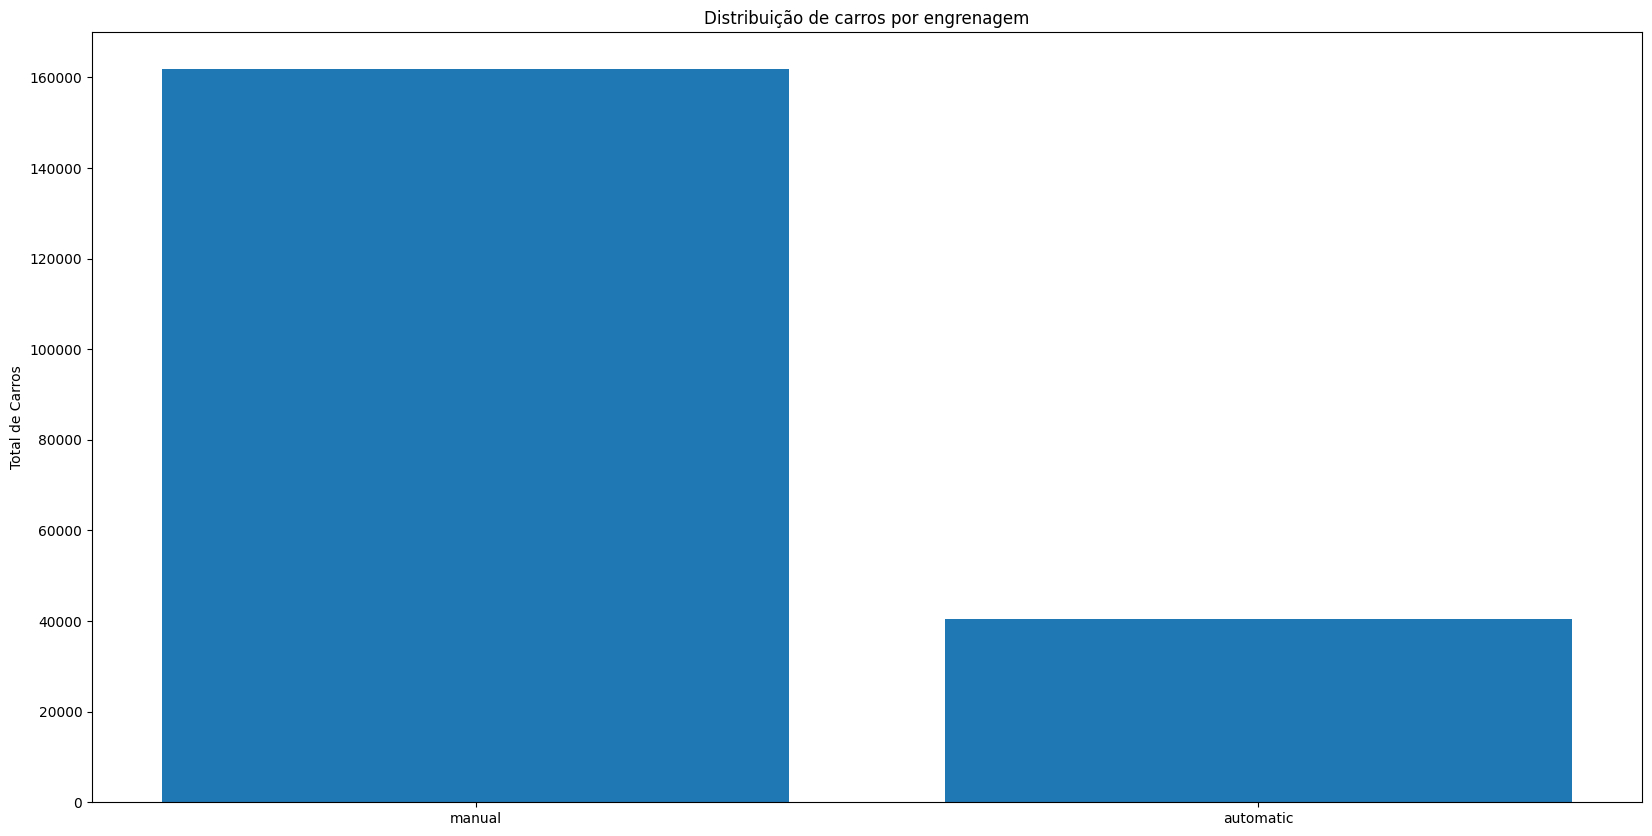

In [41]:
# Gráfico da distribuição quantidade de carros por tipo de engrenagem - plt é a biblioteca Matplotlib
plt.figure(figsize=(20,10))
plt.bar(labels, carros_por_engrenagem) # plt.bar para gráfico de barras. Variáveis nos eixos X e Y
plt.title('Distribuição de carros por engrenagem') # plt.title para inserir título no gráfico
plt.ylabel('Total de Carros') # # plt.ylabel para inserir título no gráfico

---
# 2-c.

In [42]:
# validando colunas
dados2.columns

Index(['year_of_reference', 'month_of_reference', 'fipe_code',
       'authentication', 'brand', 'model', 'fuel', 'gear', 'engine_size',
       'year_model', 'avg_price_brl'],
      dtype='object')

In [43]:
# exibindo df
dados2.head()

,year_of_reference,month_of_reference,fipe_code,authentication,brand,model,fuel,gear,engine_size,year_model,avg_price_brl
0,2021,January,004001-0,cfzlctzfwrcp,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Gasoline,manual,1,2002,9162
1,2021,January,004001-0,cdqwxwpw3y2p,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Gasoline,manual,1,2001,8832
2,2021,January,004001-0,cb1t3xwwj1xp,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Gasoline,manual,1,2000,8388
3,2021,January,004001-0,cb9gct6j65r0,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Alcohol,manual,1,2000,8453
4,2021,January,004003-7,g15wg0gbz1fx,GM - Chevrolet,Corsa Pick-Up GL/ Champ 1.6 MPFI / EFI,Gasoline,manual,"1,6",2001,12525


In [44]:
# verificando data types
dados2.dtypes

year_of_reference     object
month_of_reference    object
fipe_code             object
authentication        object
brand                 object
model                 object
fuel                  object
gear                  object
engine_size           object
year_model            object
avg_price_brl         object
dtype: object

In [45]:
# Transformando a coluna avg_price_brl em numerico para calcular media
dados2['avg_price_brl'] = pd.to_numeric(dados2['avg_price_brl'])
dados2.dtypes

year_of_reference     object
month_of_reference    object
fipe_code             object
authentication        object
brand                 object
model                 object
fuel                  object
gear                  object
engine_size           object
year_model            object
avg_price_brl          int64
dtype: object

In [50]:
# Calculando a média por meses (coluna month_of_reference) para saber se os preços (avg_price_brl)  aumentaram ou diminuíram entre os meses de 2022 (filtro year_of_reference == 2022)
media_precos_carro_meses = dados2.query("year_of_reference == 2022").groupby(['month_of_reference'])['avg_price_brl'].mean().round(0) # round para arrendodar
media_precos_carro_meses.head()

month_of_reference
April       57150.0
August      57924.0
December    57997.0
February    55825.0
January     54840.0
Name: avg_price_brl, dtype: float64

In [51]:
# Lista com meses ordenado
order_by = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Reindexar para ordenar pelo nome mês
media_precos_carro_meses = media_precos_carro_meses.reindex(order_by)

In [52]:
# Utilizando a função reset_index para criar uma ordem e facilitar a criação do gráfico
media_precos_carro_meses = media_precos_carro_meses.reset_index(name='Preço Médio')
media_precos_carro_meses.head()

,month_of_reference,Preço Médio
0,January,54840.0
1,February,55825.0
2,March,56849.0
3,April,57150.0
4,May,57800.0


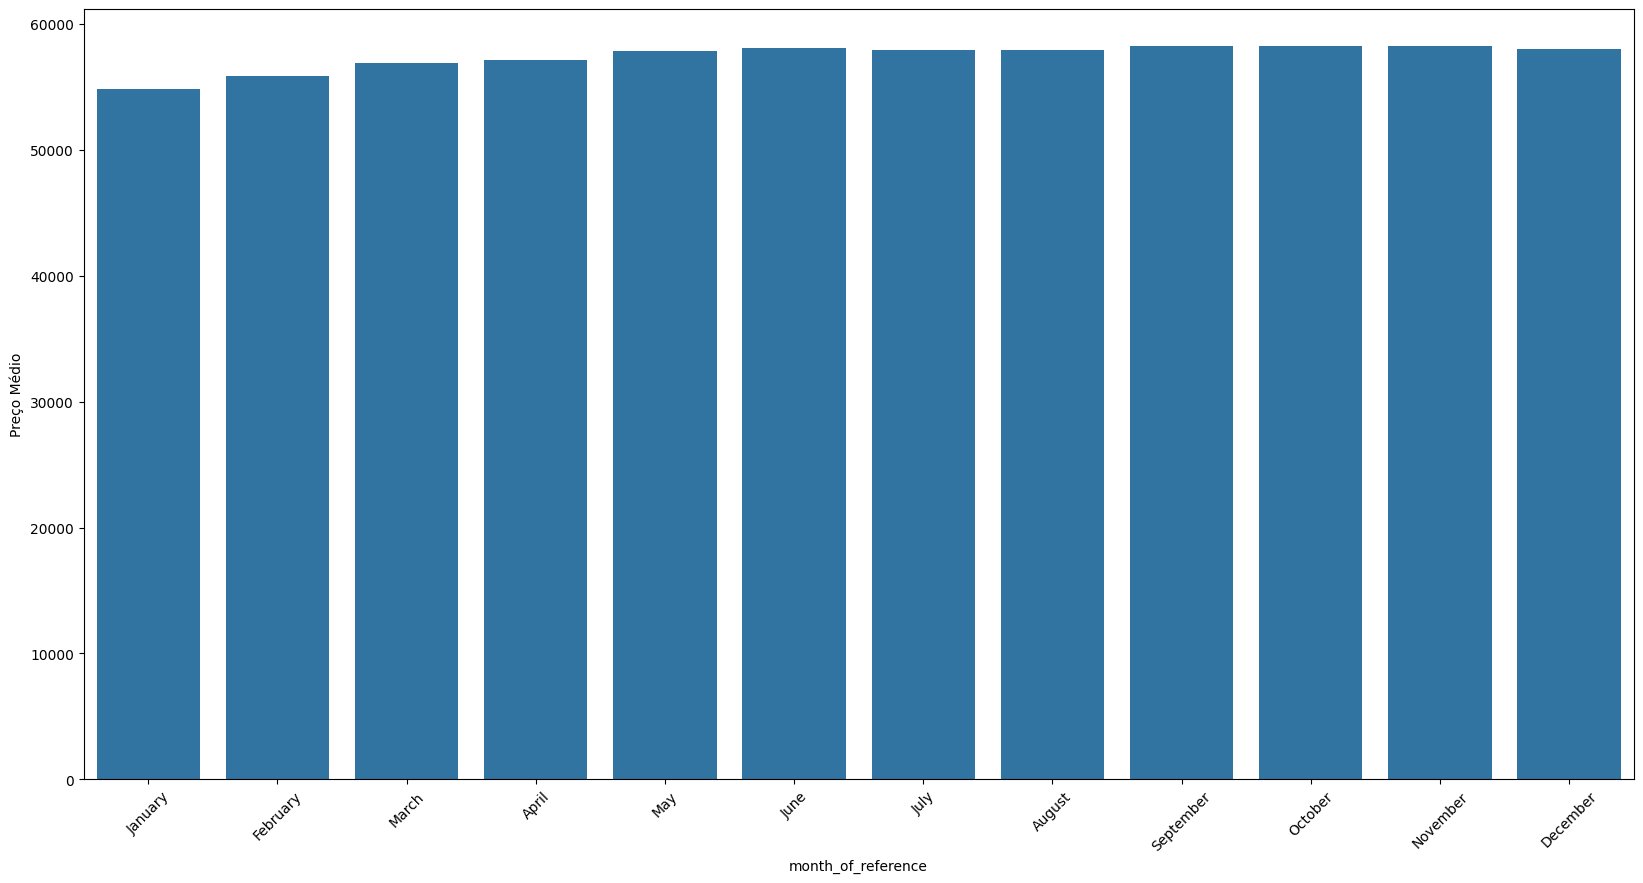

In [53]:
# Visualizando a média de preços por mês de 2022
plt.figure(figsize=(20,10)) # Aumentar tamanho da imagem que será impressa na tela
sns.barplot(x='month_of_reference', y='Preço Médio', data=media_precos_carro_meses)
plt.xticks(rotation=45);


---
# 2-d.

In [56]:
# Distribuição de média de preço por marca e tipo de cambio
media_preco_carro_marca_engranagem = dados2.groupby(['brand', 'gear'])['avg_price_brl'].mean().round(0) # round para arrendodar
media_preco_carro_marca_engranagem.head()

brand           gear     
Fiat            automatic    97397.0
                manual       39694.0
Ford            automatic    84769.0
                manual       51784.0
GM - Chevrolet  automatic    88157.0
Name: avg_price_brl, dtype: float64

In [57]:
# Utilizando a função reset_index para criar uma ordem e facilitar a criação do gráfico
media_preco_carro_marca_engranagem = media_preco_carro_marca_engranagem.reset_index(name='Preço Carro')
media_preco_carro_marca_engranagem.head()

,brand,gear,Preço Carro
0,Fiat,automatic,97397.0
1,Fiat,manual,39694.0
2,Ford,automatic,84769.0
3,Ford,manual,51784.0
4,GM - Chevrolet,automatic,88157.0


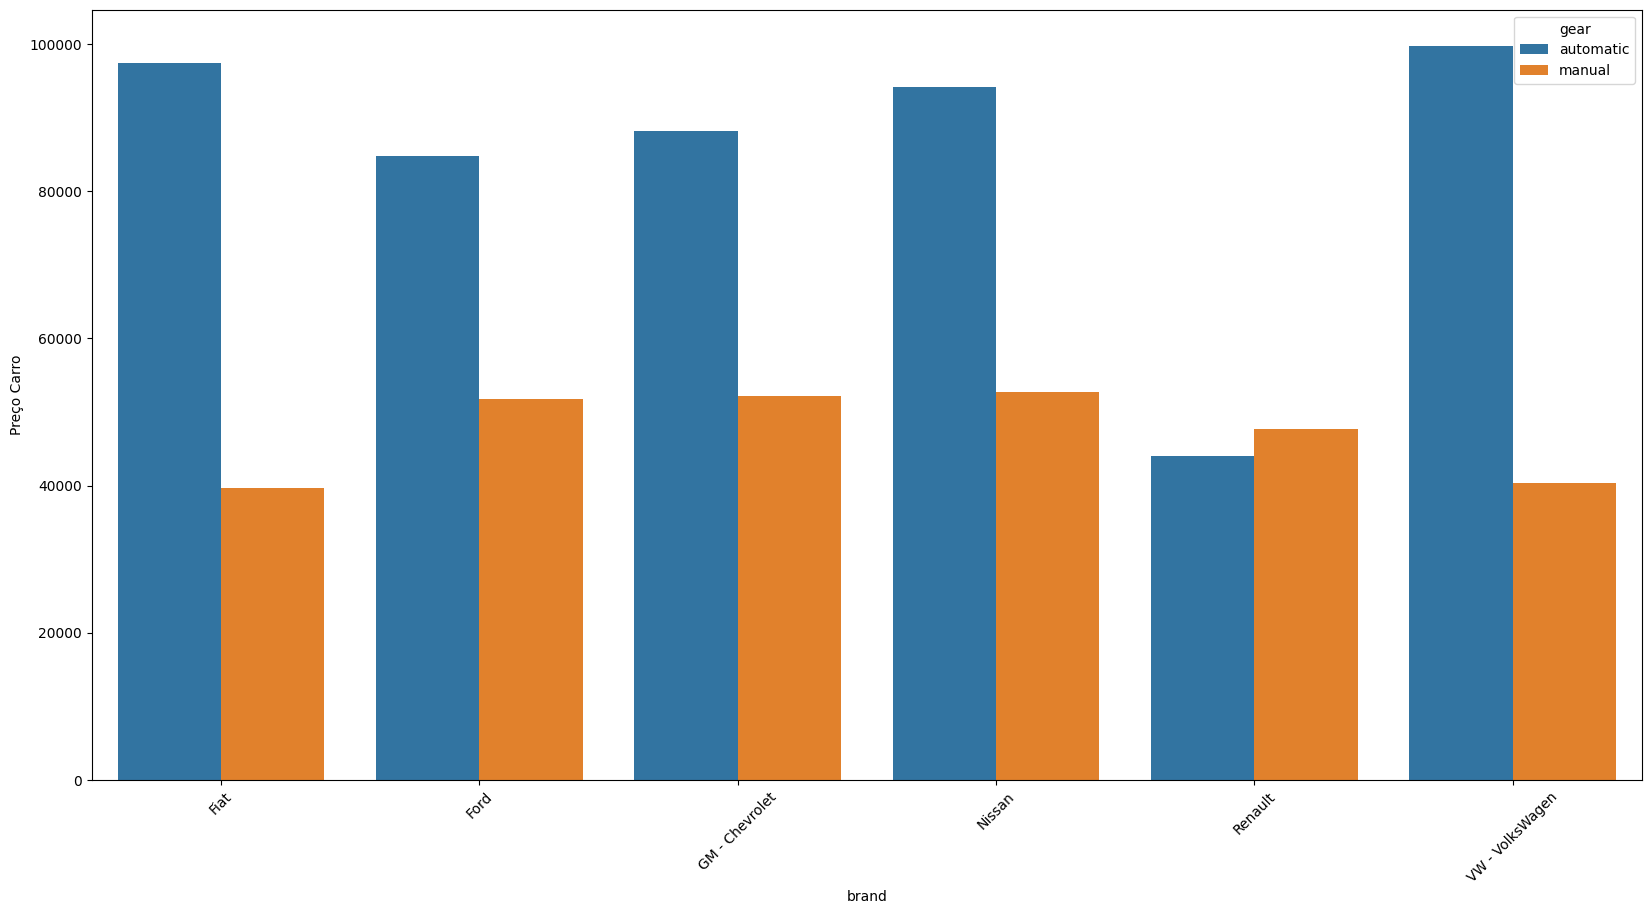

In [58]:
# Visualizando a distribuição de marca por tipo de cambio
plt.figure(figsize=(20,10)) # Aumentar tamanho da imagem que será impressa na tela
sns.barplot(x='brand', y='Preço Carro', hue='gear', data=media_preco_carro_marca_engranagem, hue_order=['automatic', 'manual'])
plt.xticks(rotation=45);

---
# 2-f.

In [59]:
# Distribuição de média de preço por marca e tipo de combustivel
media_preco_carro_marca_combustivel = dados2.groupby(['brand', 'fuel'])['avg_price_brl'].mean().round(0) # round para arrendodar
media_preco_carro_marca_combustivel.head()

brand  fuel    
Fiat   Alcohol     11510.0
       Diesel      99814.0
       Gasoline    37197.0
Ford   Alcohol     10149.0
       Diesel      94526.0
Name: avg_price_brl, dtype: float64

In [60]:
# Utilizando a função reset_index para criar uma ordem e facilitar a criação do gráfico
media_preco_carro_marca_combustivel = media_preco_carro_marca_combustivel.reset_index(name='Preço Carro')
media_preco_carro_marca_combustivel.head()

,brand,fuel,Preço Carro
0,Fiat,Alcohol,11510.0
1,Fiat,Diesel,99814.0
2,Fiat,Gasoline,37197.0
3,Ford,Alcohol,10149.0
4,Ford,Diesel,94526.0


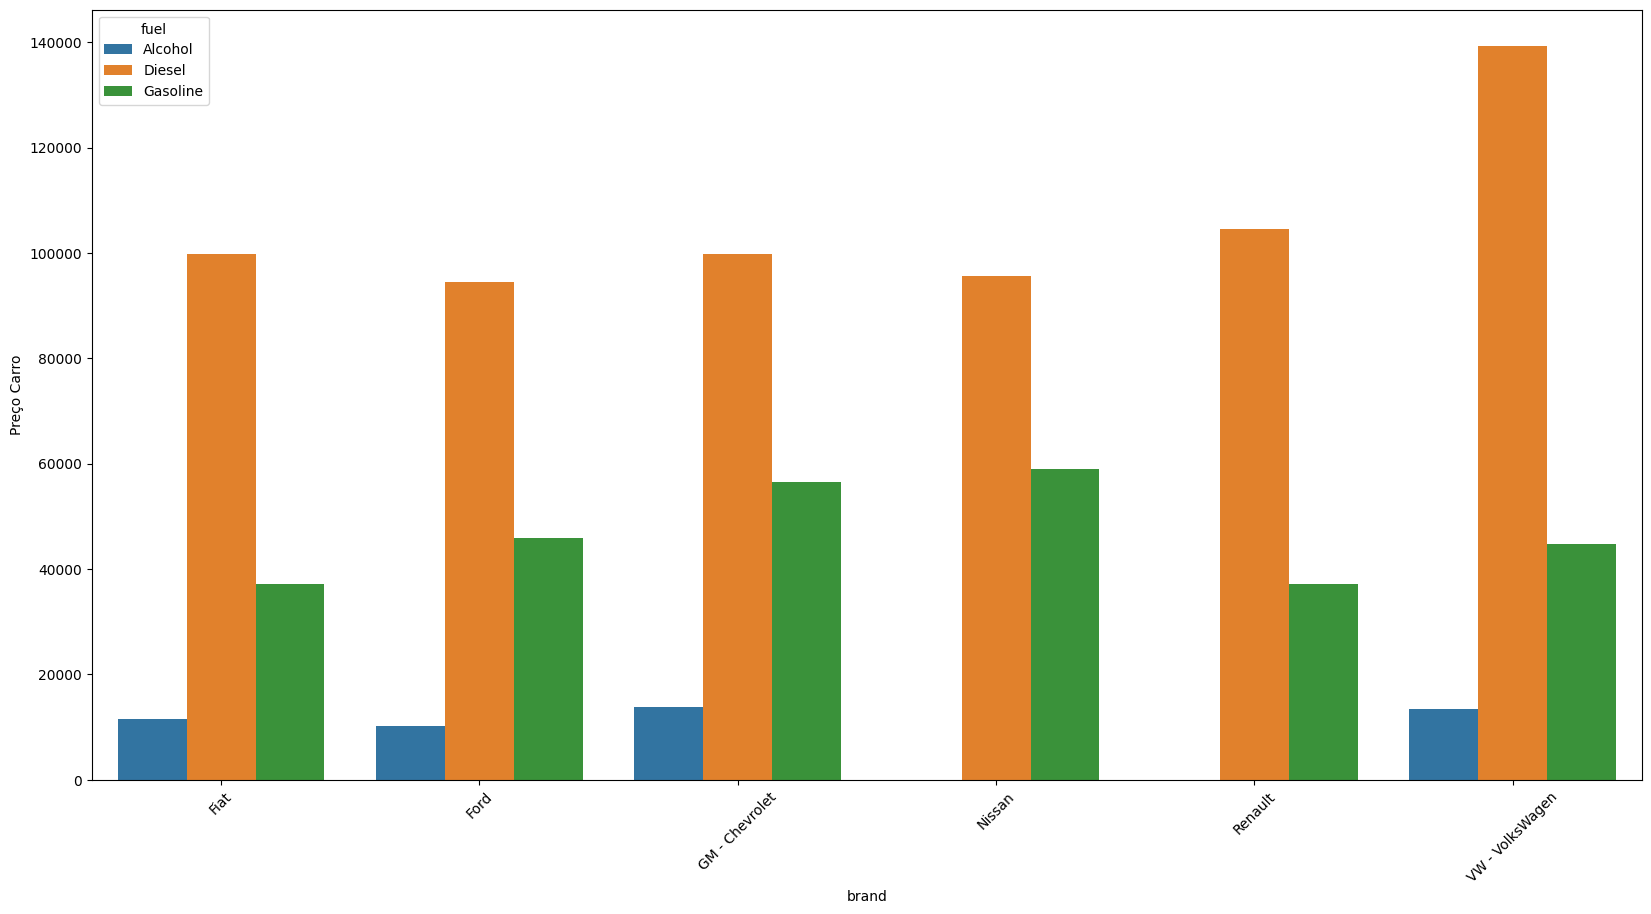

In [61]:
# Visualizando a distribuição de preço por marca e tipo de combustivel
plt.figure(figsize=(20,10)) # Aumentar tamanho da imagem que será impressa na tela
sns.barplot(x='brand', y='Preço Carro', hue='fuel', data=media_preco_carro_marca_combustivel, hue_order=['Alcohol', 'Diesel','Gasoline'])
plt.xticks(rotation=45);

---
# 3-a.

In [62]:
dados2.head()

# possiveis variaveis numericas (brand, fuel, gear, engine_size)

,year_of_reference,month_of_reference,fipe_code,authentication,brand,model,fuel,gear,engine_size,year_model,avg_price_brl
0,2021,January,004001-0,cfzlctzfwrcp,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Gasoline,manual,1,2002,9162
1,2021,January,004001-0,cdqwxwpw3y2p,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Gasoline,manual,1,2001,8832
2,2021,January,004001-0,cb1t3xwwj1xp,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Gasoline,manual,1,2000,8388
3,2021,January,004001-0,cb9gct6j65r0,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Alcohol,manual,1,2000,8453
4,2021,January,004003-7,g15wg0gbz1fx,GM - Chevrolet,Corsa Pick-Up GL/ Champ 1.6 MPFI / EFI,Gasoline,manual,"1,6",2001,12525


In [63]:
dados2.brand.unique()

array(['GM - Chevrolet', 'Fiat', 'Ford', 'Nissan', 'Renault',
       'VW - VolksWagen'], dtype=object)

In [64]:
def atribuir_valor_numerico(categoria):
    if categoria == 'GM - Chevrolet':
        return 1
    elif categoria == 'Fiat':
        return 2
    elif categoria == 'Ford':
        return 3
    elif categoria == 'Nissan':
        return 4
    elif categoria == 'Renault':
        return 5
    elif categoria == 'VW - VolksWagen':
        return 6
    else:
        return None  # Caso queira lidar com categorias não mapeadas

# Criar a nova coluna usando a função aplicada na coluna 'brand'
dados2['brand_numerico'] = dados2['brand'].apply(atribuir_valor_numerico)

In [65]:
dados2.fuel.unique()

array(['Gasoline', 'Alcohol', 'Diesel'], dtype=object)

In [66]:
def atribuir_valor_numerico(categoria):
    if categoria == 'GM - Chevrolet':
        return 10
    elif categoria == 'Gasoline':
        return 20
    elif categoria == 'Alcohol':
        return 30
    elif categoria == 'Diesel':
        return 40
    else:
        return None  # Caso queira lidar com categorias não mapeadas

# Criar a nova coluna usando a função aplicada na coluna 'fuel
dados2['fuel_numerico'] = dados2['fuel'].apply(atribuir_valor_numerico)

In [67]:
dados2.gear.unique()

array(['manual', 'automatic'], dtype=object)

In [68]:
# Coluna gear tem dois valores: manual e automatic. Após aplicar a função abaixo, ficará com valores 0 e 1 (1 manual e 0 automatic)
dados2['gear'] = LabelEncoder().fit_transform(dados2['gear']) 
dados2.head()

,year_of_reference,month_of_reference,fipe_code,authentication,brand,model,fuel,gear,engine_size,year_model,avg_price_brl,brand_numerico,fuel_numerico
0,2021,January,004001-0,cfzlctzfwrcp,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Gasoline,1,1,2002,9162,1,20
1,2021,January,004001-0,cdqwxwpw3y2p,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Gasoline,1,1,2001,8832,1,20
2,2021,January,004001-0,cb1t3xwwj1xp,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Gasoline,1,1,2000,8388,1,20
3,2021,January,004001-0,cb9gct6j65r0,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Alcohol,1,1,2000,8453,1,30
4,2021,January,004003-7,g15wg0gbz1fx,GM - Chevrolet,Corsa Pick-Up GL/ Champ 1.6 MPFI / EFI,Gasoline,1,"1,6",2001,12525,1,20


In [69]:
dados2.gear.unique()

array([1, 0])

In [70]:
sorted(dados2.engine_size.unique())

['1',
 '1,2',
 '1,3',
 '1,4',
 '1,5',
 '1,6',
 '1,8',
 '1,9',
 '2',
 '2,2',
 '2,3',
 '2,4',
 '2,5',
 '2,7',
 '2,8',
 '3',
 '3,2',
 '3,3',
 '3,5',
 '3,6',
 '3,8',
 '3,9',
 '4',
 '4,1',
 '4,2',
 '4,3',
 '5',
 '5,7',
 '6,2']

In [71]:
def atribuir_valor_numerico(categoria):
    if categoria in ('1', '1,2', '1,3', '1,4', '1,5', '1,6', '1,8', '1,9'):
        return 5
    elif categoria in ('2', '2,2', '2,3', '2,4', '2,5', '2,7', '2,8'):
        return 10
    elif categoria in ('3', '3,2', '3,3', '3,5', '3,6', '3,8', '3,9'):
        return 15
    elif categoria in ( '4', '4,1', '4,2', '4,3'):
        return 20
    elif categoria in ('5', '5,7'):
        return 25
    elif categoria == '6,2':
        return 30
    else:
        return None  # Caso queira lidar com categorias não mapeadas

# Criar a nova coluna usando a função aplicada na coluna 'Anos experiencia'
dados2['engine_size_numerico'] = dados2['engine_size'].apply(atribuir_valor_numerico)
dados2.head()

,year_of_reference,month_of_reference,fipe_code,authentication,brand,model,fuel,gear,engine_size,year_model,avg_price_brl,brand_numerico,fuel_numerico,engine_size_numerico
0,2021,January,004001-0,cfzlctzfwrcp,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Gasoline,1,1,2002,9162,1,20,5
1,2021,January,004001-0,cdqwxwpw3y2p,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Gasoline,1,1,2001,8832,1,20,5
2,2021,January,004001-0,cb1t3xwwj1xp,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Gasoline,1,1,2000,8388,1,20,5
3,2021,January,004001-0,cb9gct6j65r0,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Alcohol,1,1,2000,8453,1,30,5
4,2021,January,004003-7,g15wg0gbz1fx,GM - Chevrolet,Corsa Pick-Up GL/ Champ 1.6 MPFI / EFI,Gasoline,1,"1,6",2001,12525,1,20,5


In [72]:
sorted(dados2.engine_size_numerico.unique())

[5, 10, 15, 20, 25, 30]

In [73]:
dados2.dtypes

year_of_reference       object
month_of_reference      object
fipe_code               object
authentication          object
brand                   object
model                   object
fuel                    object
gear                     int32
engine_size             object
year_model              object
avg_price_brl            int64
brand_numerico           int64
fuel_numerico            int64
engine_size_numerico     int64
dtype: object

In [74]:
dados2.columns

Index(['year_of_reference', 'month_of_reference', 'fipe_code',
       'authentication', 'brand', 'model', 'fuel', 'gear', 'engine_size',
       'year_model', 'avg_price_brl', 'brand_numerico', 'fuel_numerico',
       'engine_size_numerico'],
      dtype='object')

---
# 3-b.

In [76]:
# Variável dados_num contém apenas variáveis numéricas de interesse (exclui o restante)
dados_num = dados2.drop(['year_of_reference', 'month_of_reference', 'fipe_code', 'authentication',
       'brand', 'model', 'fuel', 'engine_size', 'year_model'],axis = 1)
dados_num.head()

,gear,avg_price_brl,brand_numerico,fuel_numerico,engine_size_numerico
0,1,9162,1,20,5
1,1,8832,1,20,5
2,1,8388,1,20,5
3,1,8453,1,30,5
4,1,12525,1,20,5


In [77]:
# Variável X contém apenas variáveis numéricas de interesse para a análise, excluindo a variável target 
X = dados_num.drop(['avg_price_brl'],axis = 1)
X.head()

,gear,brand_numerico,fuel_numerico,engine_size_numerico
0,1,1,20,5
1,1,1,20,5
2,1,1,20,5
3,1,1,30,5
4,1,1,20,5


In [78]:
# Variável Y contém apenas a variável target - Faixa Salarial
Y = dados_num['avg_price_brl']
Y.head()

0     9162
1     8832
2     8388
3     8453
4    12525
Name: avg_price_brl, dtype: int64

In [79]:
# Divisão: 25% dos dados são de teste e 75% de treinamento
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 42)

In [80]:
# Observando os dados de treinamento
print(X_train.shape)
X_train.head(1)

(151721, 4)


,gear,brand_numerico,fuel_numerico,engine_size_numerico
156364,1,2,40,10


In [81]:
# Observando os dados de teste
print(X_test.shape)
X_test.head(1)

(50574, 4)


,gear,brand_numerico,fuel_numerico,engine_size_numerico
180633,1,2,20,5


In [82]:
# Observando a variável target
Y_test.head()

180633    42595
13130     10989
163315     9087
121464    26965
14044     57102
Name: avg_price_brl, dtype: int64

---
# 3-c.

#### 3-c.1 Random Forest

In [83]:
# Algoritmo Random Forest, sem especificar nenhum parâmetro (número de árvores, número de ramificações, etc)
model_rf = RandomForestRegressor()

In [84]:
# Ajuste do modelo, de acordo com as variáveis de treinamento
model_rf.fit(X_train, Y_train)

RandomForestRegressor()

#### 3-c.2 Random Forest utilizando parâmetros do algoritmo Random Forest

In [85]:
model_rf_parametros = RandomForestRegressor(max_depth=29, min_samples_leaf=32, min_samples_split=28,
                       n_estimators=208, random_state=43)

In [86]:
# Ajuste do modelo, de acordo com as variáveis de treinamento
model_rf_parametros.fit(X_train, Y_train)

RandomForestRegressor(max_depth=29, min_samples_leaf=32, min_samples_split=28,
                      n_estimators=208, random_state=43)

#### 3-c. 3 XGBoost

In [87]:
model_xgboost = XGBRegressor()

In [88]:
# Ajuste do modelo, de acordo com as variáveis de treinamento
model_xgboost.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

---
# 3-d.

In [89]:
# Predição dos preços médios dos carros utilizando Random Forest, sem especificar nenhum parâmetro
valores_preditos_rf = model_rf.predict(X_test)
valores_preditos_rf

array([34867.2067132 , 32921.36525012, 34867.2067132 , ...,
       83316.50147958, 34867.2067132 , 34867.2067132 ])

In [90]:
# Predição dos preços médios dos carros utilizando Random Forest, mas utilizando parâmetros do algoritmo Random Forest
valores_preditos_rf_parametros = model_rf_parametros.predict(X_test)
valores_preditos_rf_parametros

array([34883.95122918, 32915.78517206, 34883.95122918, ...,
       82959.22026594, 34883.95122918, 34883.95122918])

In [91]:
# Predição dos preços médios dos carros utilizando XGBoost
valores_preditos_xgboost = model_xgboost.predict(X_test)
valores_preditos_xgboost

array([34880.09 , 32910.477, 34880.09 , ..., 83303.4  , 34880.09 ,
       34880.09 ], dtype=float32)

---
# 3-e.

### Análise de importância das variáveis para estimar a variável target com Random Forest

In [92]:
model_rf.feature_importances_
feature_importances = pd.DataFrame(model_rf.feature_importances_, index = X_train.columns, columns=['importance']).sort_values('importance', ascending = False)
feature_importances

,importance
engine_size_numerico,0.387458
fuel_numerico,0.307408
gear,0.219689
brand_numerico,0.085445


### Análise de importância das variáveis para estimar a variável target com Random Forest utilizando parâmetros do Algoritmo

In [93]:
model_rf_parametros.feature_importances_
feature_importances = pd.DataFrame(model_rf_parametros.feature_importances_, index = X_train.columns, columns=['importance']).sort_values('importance', ascending = False)
feature_importances

,importance
engine_size_numerico,0.386085
fuel_numerico,0.309029
gear,0.220740
brand_numerico,0.084146


### Análise de importância das variáveis para estimar a variável target com XGBoost

In [94]:
model_xgboost.feature_importances_
feature_importances = pd.DataFrame(model_xgboost.feature_importances_, index = X_train.columns, columns=['importance']).sort_values('importance', ascending = False)
feature_importances

,importance
fuel_numerico,0.394872
engine_size_numerico,0.283042
gear,0.278104
brand_numerico,0.043982


---
# 3-g.

MSE - calcula o erro quadrático médio das predições do nosso modelo. Quanto maior o MSE, pior é o modelo.


O MAE calcula a média da diferença absoluta entre o valor predito e o valor real. Nesse caso, os erros são penalizados linearmente, ou seja, todos terão o mesmo peso na média.


O R² é uma métrica que varia entre 0 e 1 e é uma razão que indica o quão bom o nosso modelo. Quanto maior seu valor, melhor é o modelo 


In [95]:
# Melhor modelo com base nas métricas de avaliação para modelo Random Forest sem especificação
mse = mean_squared_error(Y_test, valores_preditos_rf)
mae = mean_absolute_error(Y_test, valores_preditos_rf)
r2_score(Y_test, valores_preditos_rf)

0.553707835461592

In [99]:
# Melhor modelo com base nas métricas de avaliação para modelo Random Forest com especificação
mse = mean_squared_error(Y_test, valores_preditos_rf_parametros)
mae = mean_absolute_error(Y_test, valores_preditos_rf_parametros)
r2_score(Y_test, valores_preditos_rf_parametros)

0.5521679676292264

In [97]:
# Melhor modelo com base nas métricas de avaliação para modelo XGBoost
mse = mean_squared_error(Y_test, valores_preditos_xgboost)
mae = mean_absolute_error(Y_test, valores_preditos_xgboost)
r2_score(Y_test, valores_preditos_xgboost)

0.5535328270120642

### **Concluindo**

#### Nesse exemplo, o modelo Random Forest, sem especificação de parâmetros como número de árvores e ramificações, foi o mais acurado: Acurácia de 55.37%
